In [9]:
import pandas as pd
import numpy as np
import pytensor
import pymc as pm
import arviz
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="arviz")

In [10]:
# reading the df
df = pd.read_csv("lalonde.csv")

In [11]:
# inspecting head
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [12]:
#inspecting datatypes
df.dtypes

id            int64
treat         int64
age           int64
educ          int64
black         int64
hispan        int64
married       int64
nodegree      int64
re74        float64
re75        float64
re78        float64
dtype: object

In [13]:
#inspecting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        614 non-null    int64  
 1   treat     614 non-null    int64  
 2   age       614 non-null    int64  
 3   educ      614 non-null    int64  
 4   black     614 non-null    int64  
 5   hispan    614 non-null    int64  
 6   married   614 non-null    int64  
 7   nodegree  614 non-null    int64  
 8   re74      614 non-null    float64
 9   re75      614 non-null    float64
 10  re78      614 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 52.9 KB


In [14]:
# inspecting statistics
df.describe()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,177.390811,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.250000,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,307.500000,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,460.750000,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,614.000000,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


Text(0.5, 1.0, 'counts of treat')

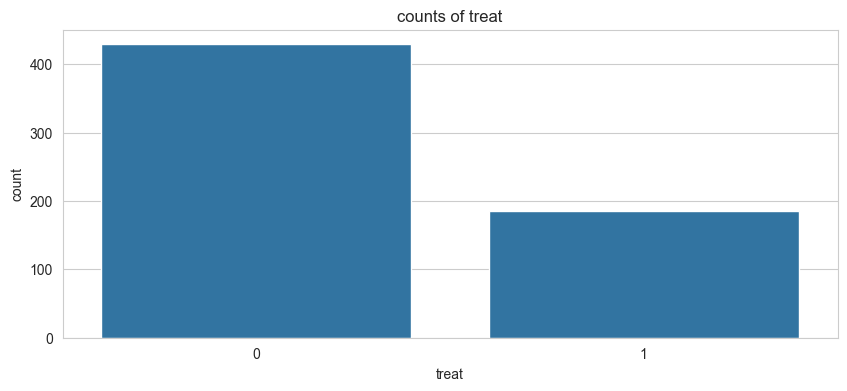

In [15]:
#inspecting how many individuals had the treatment
plt.figure(figsize=(10,4))
sns.countplot(data=df,x="treat")
plt.title("counts of treat")

In [ ]:
#plotting the distribution of incomes before and after the treatment period
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.histplot(data=df, x="re74", kde=True, hue="treat")
plt.title("re74 distribution")
plt.subplot(1,3,2)
sns.histplot(data=df, x="re75", kde=True, hue="treat")
plt.title("re75 distribution")
plt.subplot(1,3,3)
sns.histplot(data=df, x="re78", kde=True, hue="treat")
plt.title("re78 distribution")
plt.tight_layout()
plt.show()

In [ ]:
#plotting the distribution of incomes before and after the treatment period
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(data=df, y="re74", hue="treat")
plt.title("re74 distribution")
plt.subplot(1,3,2)
sns.boxplot(data=df, y="re75", hue="treat")
plt.title("re75 distribution")
plt.subplot(1,3,3)
sns.boxplot(data=df, y="re78", hue="treat")
plt.title("re78 distribution")
plt.tight_layout()
plt.show()

In [ ]:
#plotting the distribution of the rest of features in the DataFrame
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sns.histplot(data=df, x="age", kde=True, hue="treat")
plt.title("age distribution")
plt.subplot(2,3,2)
sns.histplot(data=df, x="educ", kde=True, hue="treat") 
plt.title("educ distribution")
plt.subplot(2,3,3)
sns.countplot(data=df, x="black", hue="treat")
plt.title("black distribution")
plt.subplot(2,3,4)
sns.countplot(data=df, x="hispan", hue="treat")
plt.title("hispan distribution")
plt.subplot(2,3,5)
sns.countplot(data=df, x="married", hue="treat")
plt.title("married distribution")
plt.subplot(2,3,6)
sns.countplot(data=df, x="nodegree", hue="treat")
plt.title("nodegree distribution")
plt.tight_layout()
plt.show()